In [27]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [28]:
df1 = pd.read_csv('../files/Customer Flight Activity.csv')
df2 = pd.read_csv('../files/Customer Loyalty History.csv')

### Cambios a aplicar:

DF1:

- Cambiar el tipo de dato de Points Accumulated a int
- Agrupar por número de cliente, año y mes, sumando el resto de columnas entre sí. 

DF2:

- Imputar nulos en la columna Salary, pasar a positivo y cambiar a tipo int.
- Cambiar el tipo de dato en Cancellation Year y Cancellation Month a tipo int.

In [29]:
df1 = df1.groupby(["Loyalty Number", "Year", "Month"], as_index=False).sum()
#Agrupamos por "Loyalty Number", "Year" y "Month" y sumamos el resto de columnas.

Unimos los dataframes para aplicar las funciones correspondientes (el resultado no cambia si aplicamos antes o después de la unión)

In [30]:
#Unimos ambos dfs por la columna que mantienen en común: 'Loyalty Number'
df = pd.merge(df1, df2, on='Loyalty Number')


Aplicamos los cambios restantes

In [ ]:
# Función para cambiar el tipo de dato a int:
def cambiar_tipo_int(col):
    """
    Convierte los valores de una columna de tipo objeto a tipo int.

    - Convierte los valores resultantes a tipo `int`.
    - Si el valor es `NaN`, lo conserva como `np.nan`.

    Parámetros:
        col (int): El valor de la columna a procesar (de tipo integer).

    Retorna:
        int: El valor convertido a tipo integer, o 0 si el valor original era nulo.

    Notas:
        Si ocurre un error durante la conversión, imprime un mensaje indicando el error.
    """
    try:
        if pd.isna(col):  # Verifica si el valor es NaN
            return 0      # Si el valor es Nulo, retorna 0 (los valores nulos no tienen impacto significativo en el análisis)
        else:
            return int(col)
    except:
        print("Ha ocurrido un error")

In [ ]:
columnas_int = ['Points Accumulated', 'Cancellation Year', 'Cancellation Month']

# cambiamos tipo de datos a float
for columna in columnas_int:
    df[columna] = df[columna].apply(cambiar_tipo_int)
print(f"Tipos de datos cambiados a int para las columnas: {columnas_int}")
print(f"Tipos de datos después del cambio: {df[columnas_int].dtypes}")
print("---" * 20)

Tipos de datos cambiados a float para las columnas: ['Points Accumulated', 'Cancellation Year', 'Cancellation Month']
Tipos de datos después del cambio: Points Accumulated    int64
Cancellation Year     int64
Cancellation Month    int64
dtype: object
------------------------------------------------------------


In [35]:
df['Salary'] = df['Salary'].apply(lambda x: -x if x < 0 else x)

In [36]:
df['Salary'].sort_values()

118223    9081.0
118220    9081.0
118218    9081.0
118217    9081.0
118216    9081.0
           ...  
401659       NaN
401660       NaN
401661       NaN
401662       NaN
401663       NaN
Name: Salary, Length: 401688, dtype: float64

Imputamos nulos en la columna 'Salary'

In [ ]:
#Calculamos el porcentaje de nulos
df['Salary'].isnull().sum() / df.shape[0]*100

25.321144769074504

Estudiamos la media y la mediana para ver qué valor nos interesa sustituir por los valores nulos:

In [39]:
df["Salary"].describe()[["mean", "50%", 'max', 'min']]

mean     79359.340907
50%      73455.000000
max     407228.000000
min       9081.000000
Name: Salary, dtype: float64

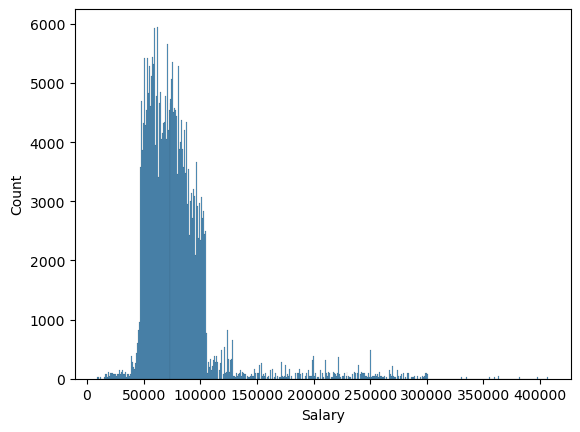

In [ ]:
# Observamos la distribución de la columna

sns.histplot(x = "Salary", data = df);

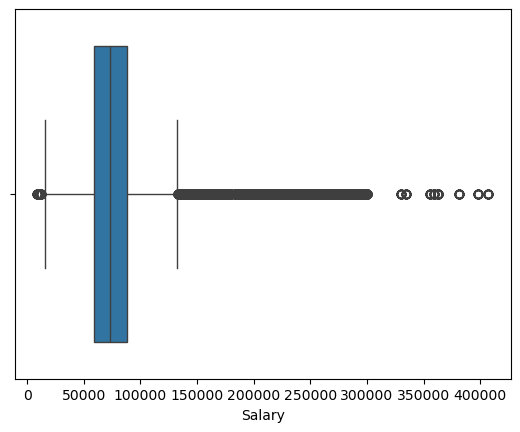

In [ ]:
# Vemos los outliers:

sns.boxplot(x= "Salary", data = df);

Como los datos están sesgados (la media es mayor que la mediana debido a los outliers), usamos la mediana para imputar los valores nulos.

In [42]:
# creamos el objeto de la clase del SimpleImputer
imp_salary = SimpleImputer(strategy = 'median')

# ajustamos y transformamos los datos
salary = imp_salary.fit_transform(df[["Salary"]])


In [43]:
# actualizamos la columna 'Salary' con los datos imputados
df["Salary"] = salary

# comprobamos si tenemos nulos. 
df['Salary'].isnull().sum()

0

In [ ]:
#Transformamos los datos a integer
df['Salary'] = df['Salary'].apply(lambda x: int(x))

In [ ]:
# Verificamos los tipos de datos del df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401688 entries, 0 to 401687
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               401688 non-null  int64  
 1   Year                         401688 non-null  int64  
 2   Month                        401688 non-null  int64  
 3   Flights Booked               401688 non-null  int64  
 4   Flights with Companions      401688 non-null  int64  
 5   Total Flights                401688 non-null  int64  
 6   Distance                     401688 non-null  int64  
 7   Points Accumulated           401688 non-null  int64  
 8   Points Redeemed              401688 non-null  int64  
 9   Dollar Cost Points Redeemed  401688 non-null  int64  
 10  Country                      401688 non-null  object 
 11  Province                     401688 non-null  object 
 12  City                         401688 non-null  object 
 13 

In [ ]:
# Guardamos el CSV con los cambios aplicados

df.to_csv('../files/df_merged.csv')